# LiftSense
A data-driven platform that estimates  **fat** **percentage** and provides **workout** and **calorie** **recommendations** using physiological inputs.

In [84]:
# importing basic libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [85]:
#importing data
gym_data = pd.read_csv('gym.csv')

In [86]:
gym_data.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [87]:
gym_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [88]:
#there are no null values so we will move on to EDA

## EDA

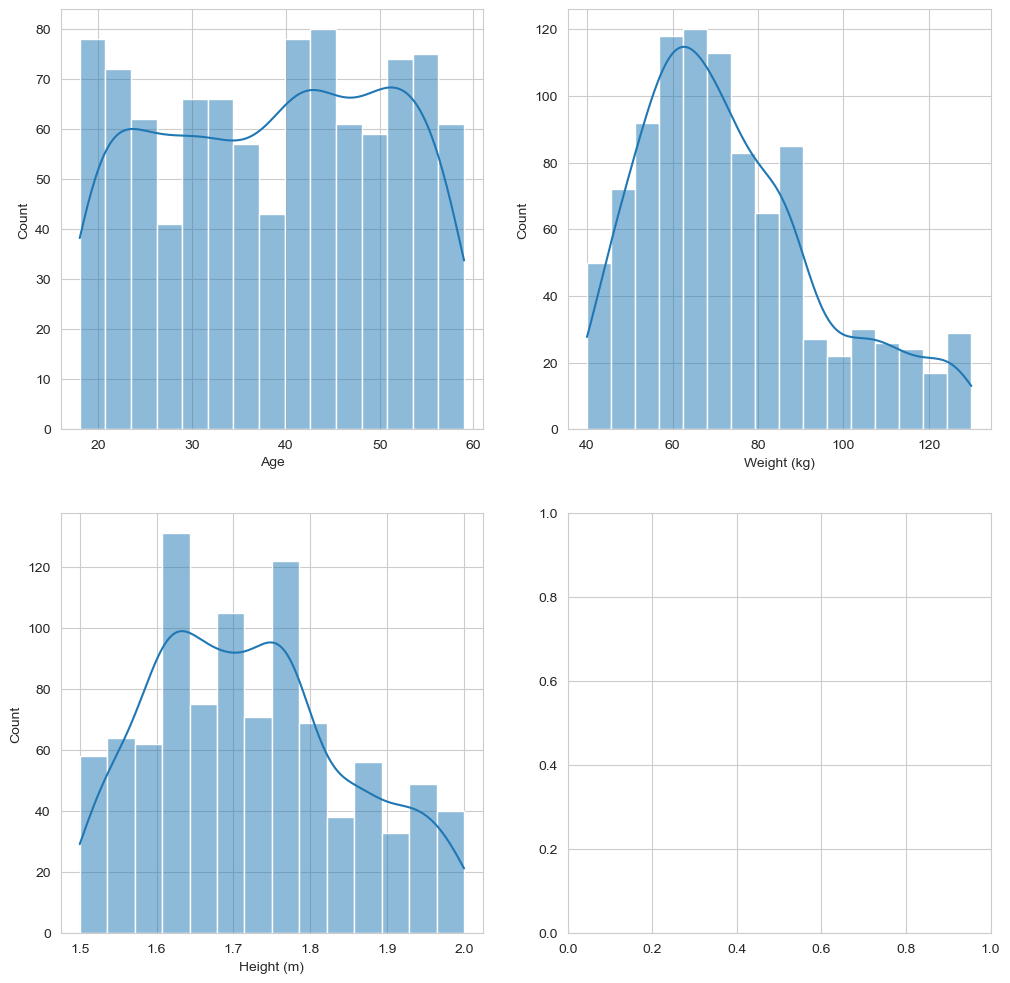

In [89]:
fig, ((ax0,ax1),(ax2,ax3)) = plt.subplots(nrows = 2,
                                          ncols = 2,
                                          figsize = (12,12))

sns.histplot(
    data = gym_data,
    x = 'Age',
    ax = ax0,
    kde = True,
    bins = 15
);


sns.histplot(
    data = gym_data,
    x = 'Weight (kg)',
    ax = ax1,
    kde = True,
 );

sns.histplot(
    data = gym_data,
    x = 'Height (m)',
    ax = ax2,
    kde = True
);

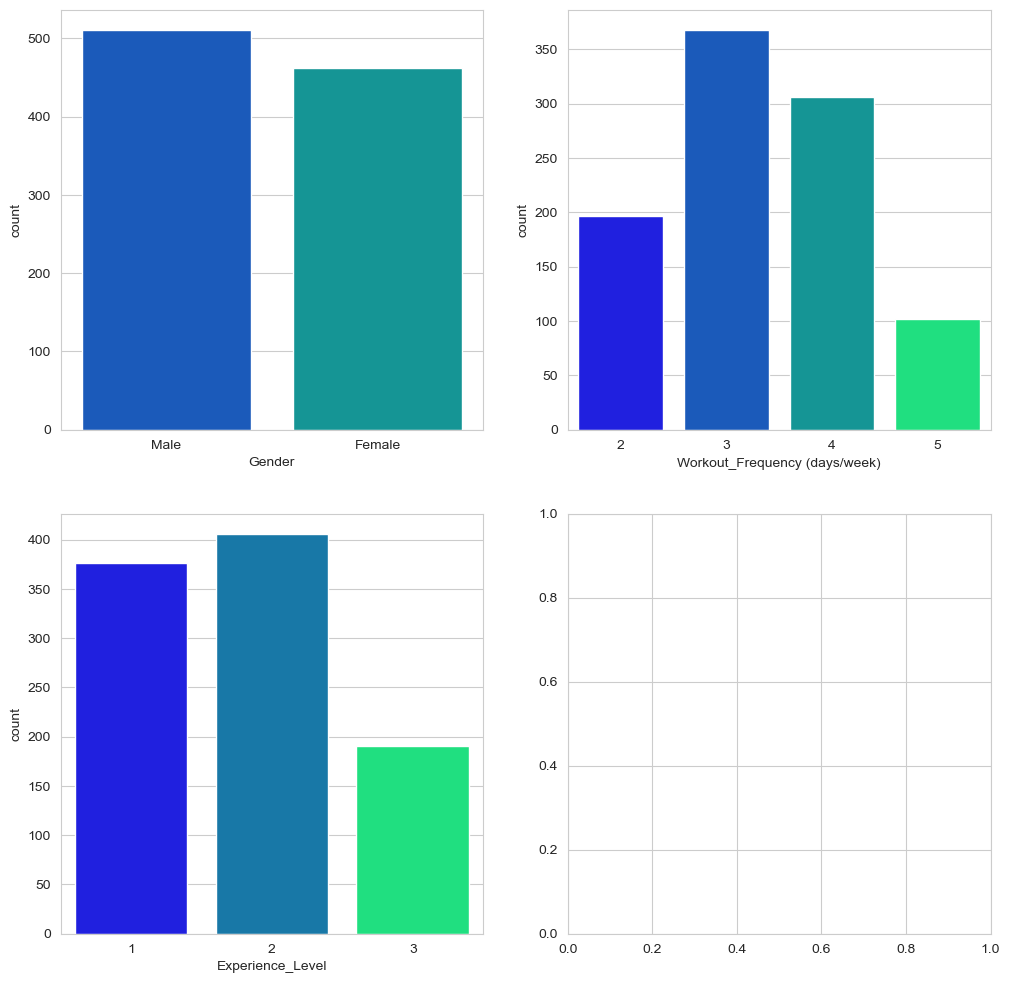

In [90]:
fig, ((ax0,ax1),(ax2,ax3)) = plt.subplots(nrows = 2,
                                          ncols = 2,
                                          figsize = (12,12))

sns.countplot(
    data = gym_data,
    x = 'Gender',
    ax = ax0,
    hue = 'Gender',
    palette = 'winter'
);

sns.countplot(
    data = gym_data,
    x = 'Workout_Frequency (days/week)',
    ax = ax1,
    hue = 'Workout_Frequency (days/week)',
    palette = 'winter',
    legend = False
);

sns.countplot(
    data = gym_data,
    x = 'Experience_Level',
    ax = ax2,
    hue = 'Experience_Level',
    palette = 'winter',
    legend = False
);

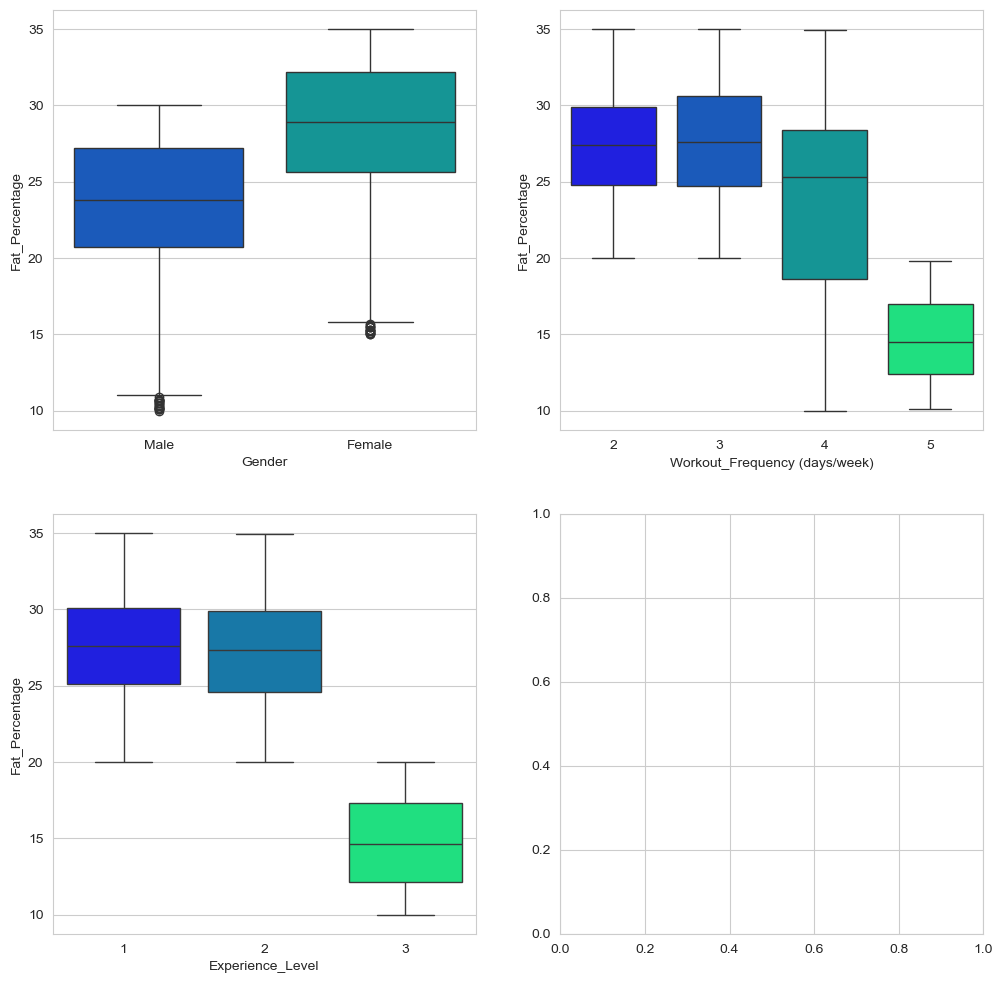

In [91]:
fig, ((ax0,ax1),(ax2,ax3)) = plt.subplots(nrows = 2,
                                          ncols = 2,
                                          figsize = (12,12))

sns.boxplot(
    data = gym_data,
    x = 'Gender',
    y = 'Fat_Percentage',
    ax = ax0,
    hue = 'Gender',
    palette = 'winter'
);

sns.boxplot(
    data = gym_data,
    x = 'Workout_Frequency (days/week)',
    y = 'Fat_Percentage',
    ax = ax1,
    hue = 'Workout_Frequency (days/week)',
    palette = 'winter',
    legend = False
);

sns.boxplot(
    data = gym_data,
    x = 'Experience_Level',
    y = 'Fat_Percentage',
    ax = ax2,
    hue = 'Experience_Level',
    palette = 'winter',
    legend = False
);

In [92]:
gym_data.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')

In [93]:
gym_data_new = gym_data[['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Fat_Percentage','Workout_Frequency (days/week)', 'Experience_Level', 'BMI']]

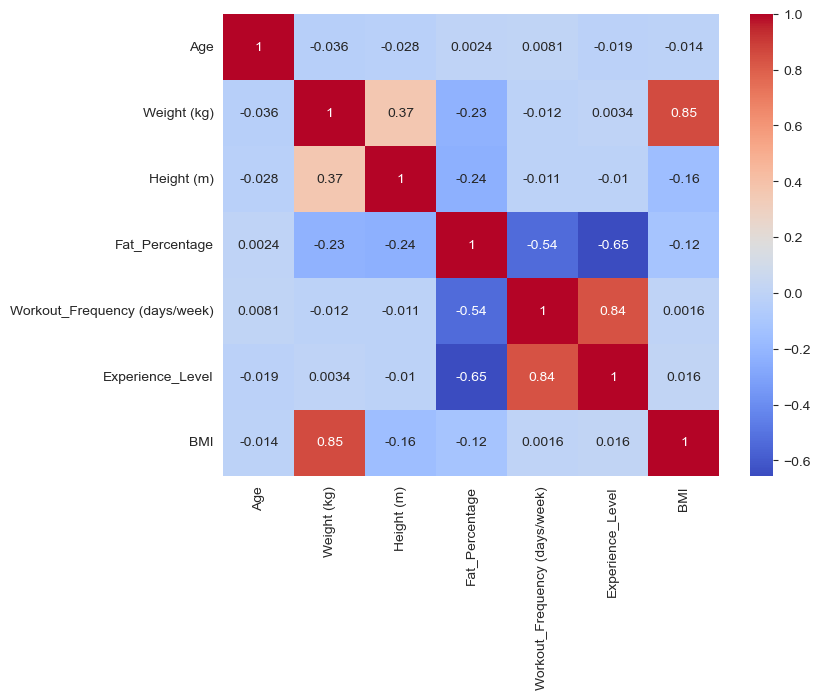

In [94]:
plt.figure(figsize = (8,6));

sns.heatmap(gym_data_new.corr(numeric_only = True), annot = True, cmap = 'coolwarm');

## Splitting the Data and Training the model

In [95]:
from sklearn.model_selection import train_test_split

x = gym_data_new.drop('Fat_Percentage', axis = 1)
y = gym_data_new['Fat_Percentage']

In [96]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [97]:
num_cols = [
    'Age',
    'Weight (kg)',
    'Height (m)',
    'BMI',
    'Workout_Frequency (days/week)',
    'Experience_Level'
]

cat_cols = ['Gender']

In [98]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

preprocessor = ColumnTransformer(
    transformers = [
        ('Scaling', StandardScaler(), num_cols),
        ('Encoding', OneHotEncoder(drop = 'first'), cat_cols)
    ]
)

In [99]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [100]:
pipelines = {
    'Linear Regression': Pipeline([
        ('preprocessing', preprocessor),
        ('model', LinearRegression())
    ]),

    'Random Forest': Pipeline([
        ('preprocessing', preprocessor),
        ('model', RandomForestRegressor())
    ]),

    'Gradient Boosting': Pipeline([
        ('preprocessing', preprocessor),
        ('model', GradientBoostingRegressor())
    ])

    
}

In [101]:
from sklearn.metrics import mean_absolute_error, r2_score

for name, pipe in pipelines.items():
    pipe.fit(x_train, y_train)
    y_preds = pipe.predict(x_test)

    print(name)
    print("MAE : ", mean_absolute_error(y_test, y_preds))
    print("r^2 score", r2_score(y_test, y_preds))
    print("-"*30)

Linear Regression
MAE :  3.200734643251047
r^2 score 0.624165581019815
------------------------------
Random Forest
MAE :  2.323599999999999
r^2 score 0.8044249840519678
------------------------------
Gradient Boosting
MAE :  2.391734967104269
r^2 score 0.7957785791886254
------------------------------


In [102]:
final_pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ('model', RandomForestRegressor())
    ])

In [103]:
final_pipeline.fit(x_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessing', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('Scaling', ...), ('Encoding', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different trans

In [105]:
import joblib

joblib.dump(final_pipeline, "fat_percentage_pipeline.pkl")

['fat_percentage_pipeline.pkl']